# Анализ оттока клиентов из банка «Метанпром».

Данный проект позволит определить причину оттока клиентов из банка «Метанпром», посредством проверки гипотез и сегментации, что позволит подготовить рекомендации по снижения оттока.

# Цели:

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.

# Задачи:

#### Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.
#### Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
#### Сформулировать и проверить статистическую гипотезу относительно представленных данных.

# Описание датасета

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `user_id` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity`  — балловая оценка собственности;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта среди продуктов;
- `last_activity` — активность за последнее время;
- `est_salary` — регулярный доход;
- `churn` — ушёл или нет.


# Декомпозиция:

*	Загрузка данных и изучение общий информации


*	Предобработка данных:
  * Посмотр типа данных в датасете
  * Преобразование названий столбцов к нижнему регистру
  * Проверка на явные и неявные дубликаты
  * Проверка пропусков, аномальных и нулевых значений
  * Проверка выбросов
  * Выполнение кодировки
  
  
*	Исследовательский анализ данных:
  * Анализ отточных клиентов по признакам (Город, возраст, пол)
  *	Представление портрета отточных клиентов


*	Работа с гипотизами:
  *	Выдвижение гипотезы
  *	Составление и проверка гипотезы
  
  
*	Сегментация пользователей:
  *	Приоритизация сегментов
  

*  	Формулировка общих выводов


*  	Рекомендации по снижению оттока клиентов

<div class="alert btn-primary"><b>Комментарий студента 3:</b><br>   
Презентация https://disk.yandex.ru/d/skvMosOfQuJ2Uw
</div>

# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy import stats as st
import math as mth
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import warnings


warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.autolayout': True})
pd.set_option('display.max_columns', None)

In [2]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)

<b>Посмотр типа данных в датасете

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Типы данных нам подходят и не затруднят анализ

<b>Преобразование названий столбцов к нижнему регистру</b>
    
Видим что наименования столбцов не приведены к общему стилю 

In [4]:
data = data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<b>Проверка на явные и неявные дубликаты

In [5]:
data.duplicated().sum()

0

Полных дубликатов нету

Посмотрим на неявые по столбцам

In [6]:
print(data['user_id'].duplicated().sum(), 'дубликата, от общего колличества не так много, дубли можно удалить ')

73 дубликата, от общего колличества не так много, дубли можно удалить 


In [7]:
data = data.drop_duplicates(subset=['user_id'], keep=False)

In [8]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [9]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [10]:
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

In [11]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

Значения 0 не должно быть, посмотрми что это может быть

In [12]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


В строке продуктов не может быть значение 0, если человек является клиентом то обладает картой что является одним продуктом

In [13]:
data = data[data['products']!=0]

In [14]:
data['products'].unique()

array([2, 3, 1, 4, 5])

In [15]:
data['credit_card'].unique()

array([0, 1])

In [16]:
data['last_activity'].unique()

array([1, 0])

In [17]:
data['churn'].unique()

array([1, 0])

<b> Проверка пропусков, аномальных и нулевых значений

In [18]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 3
equity              0
balance          2245
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [19]:
round(data.isna().sum()/len(data)*100,1)

user_id           0.0
score             0.0
city              0.0
gender            0.0
age               0.0
equity            0.0
balance          22.8
products          0.0
credit_card       0.0
last_activity     0.0
est_salary        0.0
churn             0.0
dtype: float64

In [20]:
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Пропусков мало, можно удалить эти строки

In [21]:
data = data.dropna(subset=['age'])

Посмотрим связан ли отток с пропуском в балансе

In [22]:
data[data['balance'].isna()]['churn'].value_counts()

0    2233
1      12
Name: churn, dtype: int64

Только в 12 строках пропуск мог быть из за ухода из банка

In [23]:
### КОД РЕВЬЮЕРА 2

data.assign(missing = data.balance.isna()).corr()['missing'].drop('missing').sort_values(ascending=False,key=abs)

equity          -0.708612
products        -0.485806
est_salary       0.309332
churn           -0.246553
credit_card      0.157297
score            0.138459
last_activity    0.029641
age             -0.028065
user_id          0.002047
balance               NaN
Name: missing, dtype: float64

Видим средний коэффициент отрицательной корреляции к столбцу equity, проверим его

In [24]:
data['distribution'] = 'пропуск'
data.distribution = data.distribution.mask(data.balance > 0, 'указан')

In [25]:
display(data.groupby(['equity', 'distribution']).user_id.count().to_frame().rename(columns={'user_id':'count'}))

count
equity distribution       
0      пропуск        2132
       указан          405
1      пропуск         114
       указан          654
2      пропуск           1
       указан         1042
3      указан         1525
4      указан         1822
5      указан         1891
6      указан          157
7      указан           77
8      указан           17
9      указан           13

Видно что при отсутствии баллов оценки собственности, больше всего пропусков

Можно предположить что при отстутсвии балов собственности, пропуски в balance равны 0

In [26]:
display(data.groupby(['products', 'distribution']).user_id.count().to_frame().rename(columns={'user_id':'count'}))

count
products distribution       
1        пропуск        1907
         указан         1380
2        пропуск         312
         указан         4755
3        пропуск          28
         указан          993
4        указан          457
5        указан           18

Так же видим что у пользователей с 1 продуктом много пропусков 

In [27]:
display(data.groupby(['city', 'distribution']).user_id.count().to_frame().rename(columns={'user_id':'count'}))

count
city      distribution       
Ростов    пропуск         235
          указан         1181
Рыбинск   пропуск         567
          указан         2053
Ярославль пропуск        1445
          указан         4369

In [28]:
data = data.drop('distribution', axis=1)

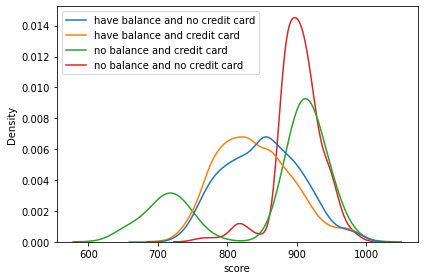

In [29]:
### КОД РЕВЬЮЕРА
nan_bal_cc_groups = data.balance.isna().map({False:"have balance ",True:"no balance "})\
                  + data.credit_card.map({1:"and credit card",0:"and no credit card"})

sns.kdeplot(data=data,hue=nan_bal_cc_groups,x='score',common_norm=False);

<b> Проверка выбросов

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,9850.0,171662.782741,3.368617e+04,94561.0,142607.0000,172505.50,200979.000,2.291450e+05
score,9850.0,848.495635,6.539526e+01,642.0,802.0000,852.00,899.000,1.000000e+03
age,9850.0,42.751371,1.218379e+01,18.0,33.0000,40.00,51.000,8.600000e+01
equity,9850.0,2.630051,1.977739e+00,0.0,0.0000,3.00,4.000,9.000000e+00
balance,7605.0,824091.747297,1.983031e+06,0.0,294797.3900,523685.55,975654.990,1.191136e+08
products,9850.0,1.868223,7.887261e-01,1.0,1.0000,2.00,2.000,5.000000e+00
credit_card,9850.0,0.680609,4.662643e-01,0.0,0.0000,1.00,1.000,1.000000e+00
last_activity,9850.0,0.521523,4.995619e-01,0.0,0.0000,1.00,1.000,1.000000e+00
est_salary,9850.0,147605.693946,1.390100e+05,2546.3,75100.6875,119493.37,174497.515,1.395064e+06
churn,9850.0,0.179492,3.837836e-01,0.0,0.0000,0.00,0.000,1.000000e+00


In [31]:
data[data['est_salary']<10000]['user_id'].count()

19

In [32]:
data[data['est_salary']<10000]['balance']

505          73.00
1700       5750.92
1753       7703.05
1883     373070.37
1988     118438.82
2174     294375.63
2186     325483.52
2663     631805.72
3606    1027438.02
3689     121065.39
4799     105603.12
4860     277249.69
6044     226648.06
6087      99885.68
7637     263390.68
8783      77092.89
9124     542971.64
9299     150934.62
9365     223228.01
Name: balance, dtype: float64

Несмотря на низкую доходность, у таких аккаунтов есть средства на балласнсе

In [33]:
data.reset_index()

,index,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9846,9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9847,9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9848,9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


<b>Выполнение кодировки 

Создадим отдельные столбцы для городов

In [34]:
data['new_city'] = data['city']
data = pd.get_dummies(data, columns = ['new_city'])
data = data.rename(columns = ({'new_city_Ростов':'Ростов', 'new_city_Рыбинск':'Рыбинск','new_city_Ярославль':'Ярославль'}))
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1


<b>Посмотрим распредиление по возрасту

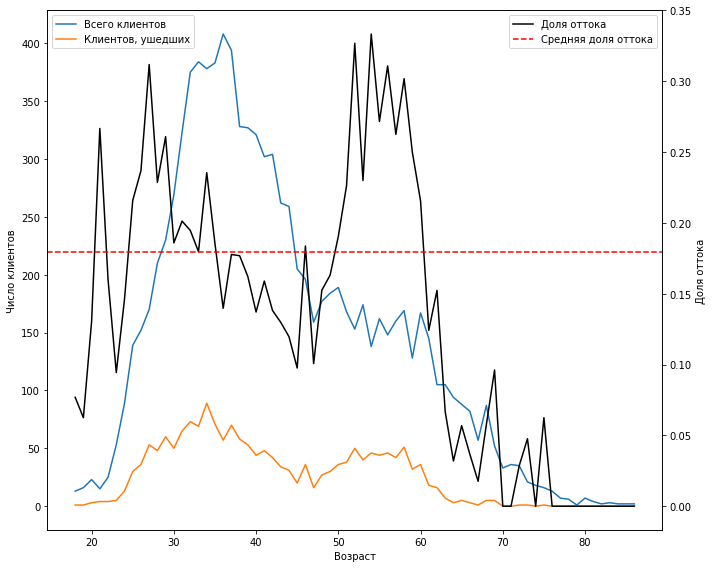

In [35]:
churn_by_age = data.groupby('age')['churn'].agg(['count', 'sum']).reset_index()

churn_by_age['churn_rate'] = churn_by_age['sum'] / churn_by_age['count']

mean_churn_rate = churn_by_age['sum'].sum() / churn_by_age['count'].sum()


fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(churn_by_age['age'], churn_by_age['count'], label='Всего клиентов')
ax.plot(churn_by_age['age'], churn_by_age['sum'], label='Клиентов, ушедших')
ax2 = ax.twinx()
ax2.plot(churn_by_age['age'], churn_by_age['churn_rate'], color='black', label='Доля оттока')
ax2.axhline(mean_churn_rate, color='red', linestyle='--', label='Средняя доля оттока')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_xlabel('Возраст')
ax.set_ylabel('Число клиентов')
ax2.set_ylabel('Доля оттока')
plt.show()

In [36]:
def grouped_age(age):
    if 24 >= age >= 18:
        return '18-24'
    if 40 >= age >= 25:
        return '25-40'
    if 49 >= age >= 41:
        return '41-49'
    if 60 >= age >= 50:
        return '50-60'
    if 61 <= age:
        return '61+'
    
data['grouped_age'] = data['age'].apply(grouped_age)

In [37]:
data['new_grouped_age']=data['grouped_age']
data = pd.get_dummies(data, columns = ['new_grouped_age'])
data = data.rename(columns = ({
    'new_grouped_age_18-24':'18-24', 'new_grouped_age_25-40':'25-40','new_grouped_age_41-49':'41-49','new_grouped_age_50-60':'50-60', 'new_grouped_age_61+':'61+'}))
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,25-40,0,1,0,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,25-40,0,1,0,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,25-40,0,1,0,0,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,50-60,0,0,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,25-40,0,1,0,0,0


Так же для пола 

In [38]:
data['new_gender'] = data['gender']
data = pd.get_dummies(data, columns = ['new_gender'])
data = data.rename(columns = ({'new_gender_Ж':'female', 'new_gender_М':'male'}))
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,25-40,0,1,0,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,25-40,0,1,0,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,25-40,0,1,0,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,50-60,0,0,0,1,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,25-40,0,1,0,0,0,0,1


# Исследовательский анализ данных

<b>Анализ отточных клиентов по признакам

Для начала проведем анализ связей между оттоком клиентов и другими параметрами, которые представлены в датафрейме

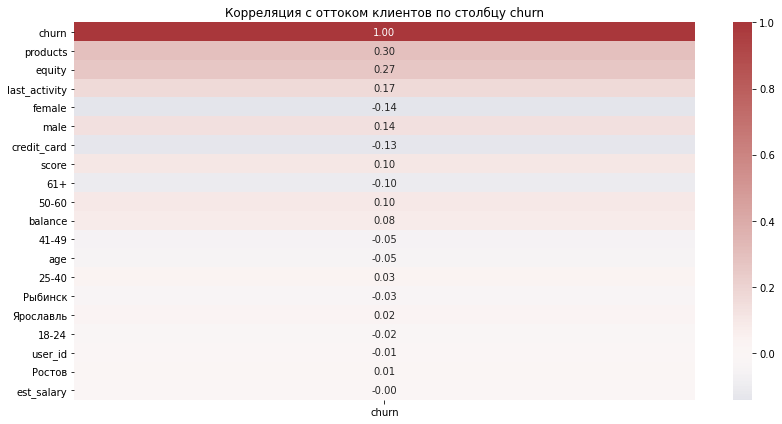

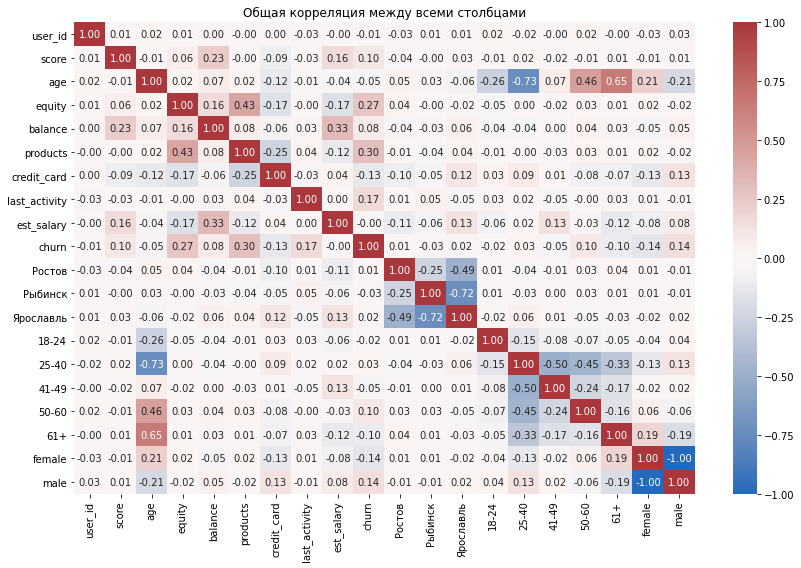

In [39]:
data['churn'] = pd.to_numeric(data['churn'], errors='coerce')
churn_corr = data.corr()['churn'].sort_values(ascending=False, key=abs)

plt.figure(figsize=(12, 6))
sns.heatmap(churn_corr.to_frame(), cmap='vlag', center=0, annot=True, fmt='.2f')
plt.title('Корреляция с оттоком клиентов по столбцу churn')

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='vlag', center=0, annot=True, fmt='.2f')
plt.title('Общая корреляция между всеми столбцами')
plt.show()

<b>Посмотрим отточность по городам 

In [40]:
churn_city = data.groupby('city')['churn'].agg(['sum', 'count']).reset_index()
churn_city['%'] = churn_city['sum'] / churn_city['count'] * 100
churn_city = churn_city[['city', 'sum', 'count', '%']].set_index('city')
churn_city

,sum,count,%
city,,,
Ростов,265,1416,18.714689
Рыбинск,415,2620,15.839695
Ярославль,1088,5814,18.713450


<AxesSubplot:title={'center':'Процент ушедших клиентов в разбивке по городам'}, xlabel='Город', ylabel='Процент ушедших клиентов'>

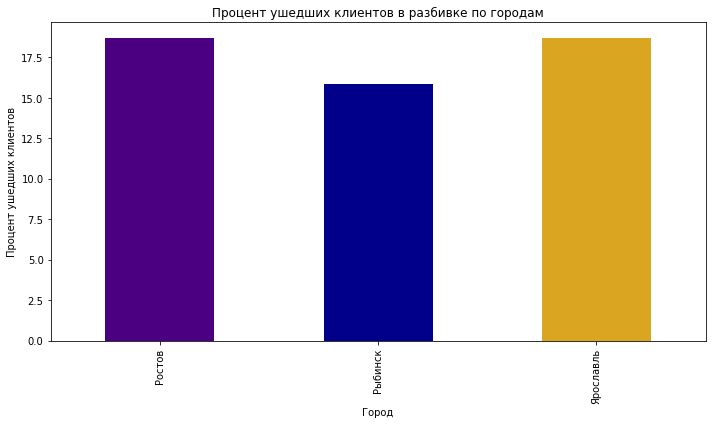

In [41]:
churn_city['%'].plot(
    kind='bar', title='Процент ушедших клиентов в разбивке по городам',
    xlabel='Город', ylabel='Процент ушедших клиентов', figsize=(10, 6),
    color=['indigo', 'darkblue', 'goldenrod'])

Доля ушедших клиентов не сильно отличается между городами. Таким образом, можно сделать вывод, что отток клиентов происходил примерно одинаково во всех городах.

<b>Посмотрим отточность по возрасту

In [42]:
data[data['churn']==1]['age'].describe()

count    1768.000000
mean       41.514140
std        11.191638
min        18.000000
25%        32.000000
50%        39.000000
75%        52.000000
max        75.000000
Name: age, dtype: float64

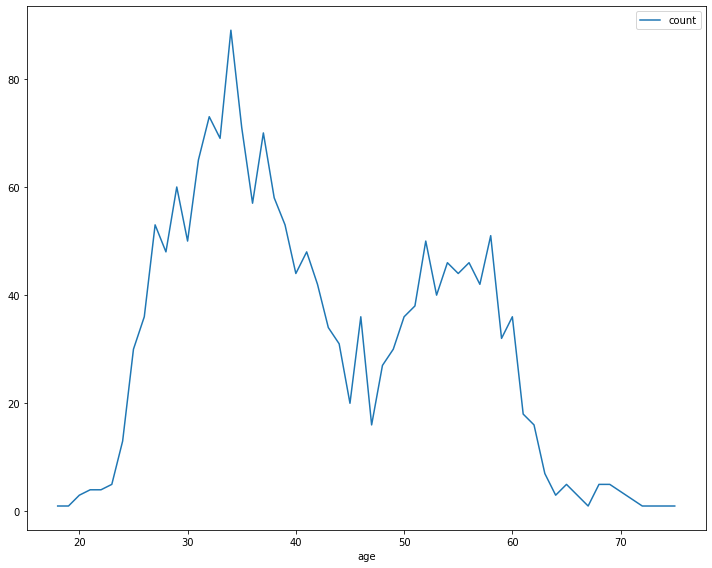

In [43]:
data[data['churn']==1]['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='age').plot(kind='line', figsize = (10,8), x = 'age', y = 'count');

In [44]:
churn_age = data.pivot_table (index = 'grouped_age', values = 'churn', aggfunc =['sum', 'count'])
churn_age.columns = churn_age.columns.droplevel(level=1)
churn_age['%'] = churn_age['sum']/churn_age['count']*100
churn_age

,sum,count,%
grouped_age,,,
18-24,31,234,13.247863
25-40,926,4791,19.327906
41-49,284,2048,13.867188
50-60,461,1756,26.252847
61+,66,1021,6.464251


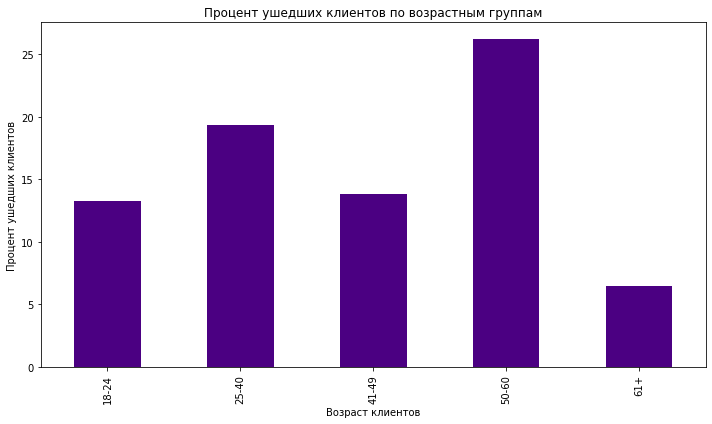

In [45]:
churn_age['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов по возрастным группам',
    xlabel = 'Возраст клиентов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), 
    color=['indigo']);

Из графика можно заметить, что наибольшее количество ушедших клиентов - более 20% - приходится на возрастную группу от 46 до 65 лет. Среди клиентов в возрасте от 26 до 45 лет отток составляет 17%, а у пользователей старше 66 лет - минимальный показатель, всего 3.5% ушедших.

<b>Посмотрим отточность по полу

In [46]:
churn_gender = data.groupby('gender')['churn'].agg(['sum', 'count']).reset_index()
churn_gender['%'] = churn_gender['sum'] / churn_gender['count'] * 100
churn_gender = churn_gender[['gender', 'sum', 'count', '%']].set_index('gender')
churn_gender

,sum,count,%
gender,,,
Ж,615,4922,12.494921
М,1153,4928,23.396916


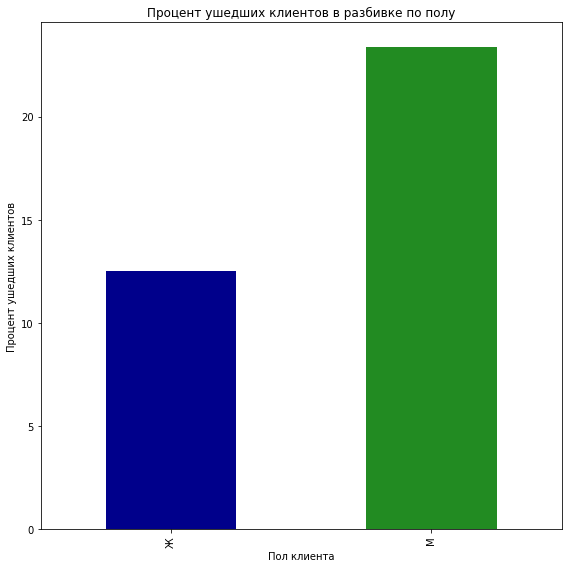

In [47]:
churn_gender['%'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по полу',
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов', figsize = (8,8),
    color=['darkblue', 'forestgreen']);

Женщины показывают почти в два раза меньший процент оттока клиентов, чем мужчины.

<b>Баллы кредитного скоринга 

In [48]:
churn_score = pd.pivot_table(data, index='score', values='churn', aggfunc=['sum', 'count'])
churn_score.columns = ['sum', 'count']
churn_score['%'] = churn_score['sum'] / churn_score['count'] * 100
churn_score = churn_score[churn_score['sum'] == 1]

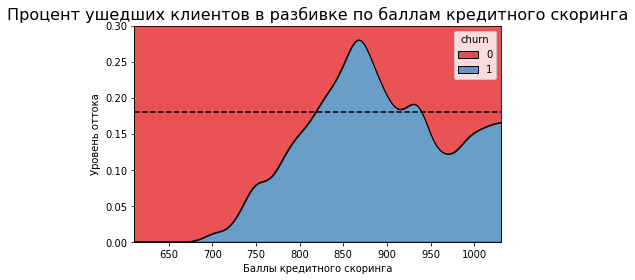

In [49]:
churn_mean = data['churn'].mean()

sns.kdeplot(data=data, x='score', hue='churn', multiple='fill', palette='Set1')
plt.title('Процент ушедших клиентов в разбивке по баллам кредитного скоринга', fontsize=16)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Уровень оттока')
plt.ylim(0, 0.3)
plt.axhline(y=churn_mean, color='black', linestyle='--')
plt.show()

Пиковое значение находится в областит 870 баллов кредитного скоринга

<b>Балловая оценка собственности

In [50]:
churn_equity = data.groupby('equity')['churn'].agg(['sum', 'count']).reset_index()
churn_equity['%'] = churn_equity['sum'] / churn_equity['count'] * 100
churn_equity = churn_equity[['equity', 'sum', 'count', '%']].set_index('equity')
churn_equity

,sum,count,%
equity,,,
0,87,2537,3.429247
1,91,768,11.848958
2,164,1043,15.723873
3,315,1525,20.655738
4,449,1822,24.643249
5,560,1891,29.613961
6,54,157,34.394904
7,35,77,45.454545
8,6,17,35.294118


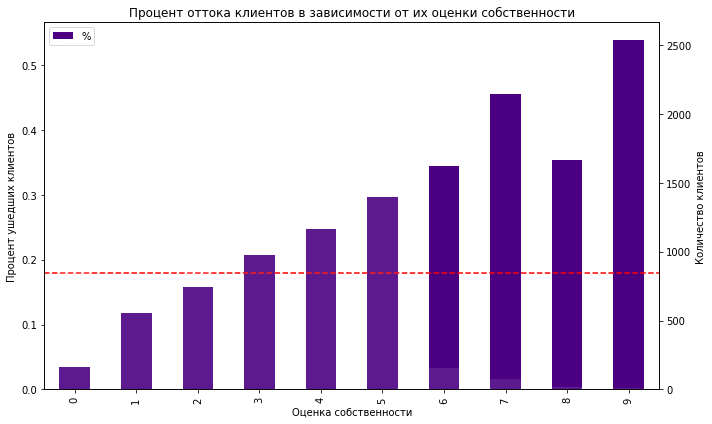

In [51]:
churn_equity = data.groupby('equity').agg({'churn': ['count', 'mean']})
churn_equity.columns = ['count', '%']
churn_equity = churn_equity.reset_index()

fig, ax = plt.subplots(figsize=(10,6))

churn_equity['%'].plot(
    kind='bar', 
    title = 'Процент оттока клиентов в зависимости от их оценки собственности',
    xlabel = 'Оценка собственности', 
    ylabel = 'Процент ушедших клиентов', 
    color = 'indigo',
    ax=ax
)

mean_churn = data['churn'].mean()
ax.axhline(mean_churn, color='r', linestyle='--')
ax.legend()

ax2 = ax.twinx()
churn_equity['count'].plot(
    kind='bar', 
    alpha=0.1,
    color = 'white',
    ax=ax2
)
ax2.set_ylabel('Количество клиентов')
ax2.grid(False)

plt.show()

Чем выше оценка собственности, тем выше процент отточных клиентов, то есть между этими двумя показателями наблюдается почти прямая зависимость.

<b>Количество продуктов, которыми пользуется клиент

In [52]:
churn_products = data.groupby('products')['churn'].agg(['sum', 'count']).reset_index()
churn_products['%'] = churn_products['sum'] / churn_products['count'] * 100
churn_products = churn_products[['products', 'sum', 'count', '%']].set_index('products')
churn_products

,sum,count,%
products,,,
1,230,3287,6.997262
2,953,5067,18.807973
3,291,1021,28.501469
4,287,457,62.800875
5,7,18,38.888889


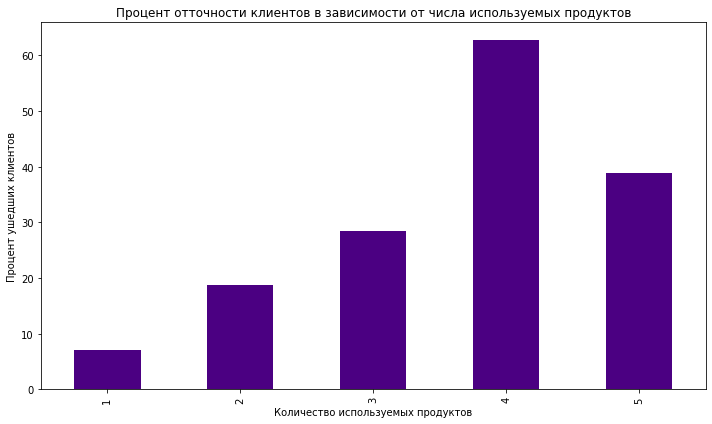

In [53]:
churn_products['%'].plot(
    kind='bar', 
    title='Процент отточности клиентов в зависимости от числа используемых продуктов',
    xlabel='Количество используемых продуктов', 
    ylabel='Процент ушедших клиентов', 
    figsize=(10, 6), 
    color='indigo'
)
plt.show()

Представленный график показывает, что более 60% клиентов, которые пользовались 4 продуктами, прекратили пользоваться услугами банка. Для клиентов, использующих 1, 2 и 3  продукта, доля оттока находится в диапазоне 20-30%, а для тех, кто пользуется 5 продуктами, доля оттока равна 38%.

<b>Представление портрета отточных клиентов

После проведения анализа и расчетов корреляции можно выделить несколько характеристических черт, которые отличают отточных пользователей от не отточных.

<b>Портреты клиентов возрастом до 50, женского пола, 3 и более балла собственности, без кредитной карты.

In [54]:
picture_f_0_avg = data.query (
    'age < 50 \
    and female == 1 \
    and equity >= 3 \
    and credit_card == 0 \
    and churn == 0') 

picture_f_0_avg

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,0,0,1,25-40,0,1,0,0,0,1,0
13,166357,837.0,Рыбинск,Ж,28.0,4,302249.22,2,0,1,30950.94,0,0,1,0,25-40,0,1,0,0,0,1,0
32,219185,828.0,Ярославль,Ж,45.0,3,409634.94,2,0,0,134770.40,0,0,0,1,41-49,0,0,1,0,0,1,0
49,214314,901.0,Ярославль,Ж,40.0,5,655642.36,2,0,0,224319.39,0,0,0,1,25-40,0,1,0,0,0,1,0
63,140749,948.0,Ярославль,Ж,34.0,5,3134788.66,2,0,0,199705.32,0,0,0,1,25-40,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,136184,860.0,Ярославль,Ж,41.0,4,1317459.84,3,0,0,117341.52,0,0,0,1,41-49,0,0,1,0,0,1,0
9929,123664,819.0,Ярославль,Ж,36.0,4,331403.71,3,0,1,229367.86,0,0,0,1,25-40,0,1,0,0,0,1,0
9960,170212,802.0,Рыбинск,Ж,47.0,3,486215.69,2,0,0,92961.67,0,0,1,0,41-49,0,0,1,0,0,1,0
9961,136500,841.0,Рыбинск,Ж,49.0,3,446187.27,2,0,0,123253.48,0,0,1,0,41-49,0,0,1,0,0,1,0


Всего получилось 548 пользователя 

In [55]:
picture_f_1_avg = data.query (
    'age < 50 \
    and female == 1 \
    and equity >= 3 \
    and credit_card == 0 \
    and churn == 1') 

picture_f_1_avg

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
61,136096,896.0,Ярославль,Ж,39.0,5,657597.09,2,0,1,266033.98,1,0,0,1,25-40,0,1,0,0,0,1,0
122,201526,894.0,Ярославль,Ж,32.0,4,1319552.08,2,0,1,140952.99,1,0,0,1,25-40,0,1,0,0,0,1,0
156,145747,850.0,Рыбинск,Ж,39.0,3,1060098.78,2,0,1,200256.52,1,0,1,0,25-40,0,1,0,0,0,1,0
158,200289,906.0,Ярославль,Ж,47.0,4,2850862.57,2,0,1,313845.95,1,0,0,1,41-49,0,0,1,0,0,1,0
228,122348,923.0,Ярославль,Ж,35.0,5,1067510.14,2,0,1,173940.25,1,0,0,1,25-40,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,127268,937.0,Ярославль,Ж,38.0,6,2183546.58,3,0,1,161524.83,1,0,0,1,25-40,0,1,0,0,0,1,0
9636,180857,860.0,Ростов,Ж,46.0,5,1299877.16,2,0,1,116598.20,1,1,0,0,41-49,0,0,1,0,0,1,0
9665,162272,892.0,Ростов,Ж,44.0,5,2203565.69,2,0,1,232345.45,1,1,0,0,41-49,0,0,1,0,0,1,0
9759,162367,857.0,Рыбинск,Ж,29.0,5,519592.40,2,0,1,53506.29,1,0,1,0,25-40,0,1,0,0,0,1,0


Всего получилось 185 пользователя 

In [56]:
filtered_users_1 = data.query(
    'age < 50 \
    and female == 1 \
    and equity >= 3 \
    and credit_card == 0')

churned_users = filtered_users_1[filtered_users_1['churn'] == 1]
num_churned_users = len(churned_users)

num_not_churned_users = len(filtered_users_1) - num_churned_users

churn_rate = num_churned_users / len(filtered_users_1) * 100

print(f'Уровень оттока: {churn_rate:.2f}%')

Уровень оттока: 25.24%


<b>Портреты клиентов возрастом до 50, мужского пола, 3 и более балла собственности, без кредитной карты.

In [57]:
picture_m_0_avg = data.query (
    'age < 50 \
    and male == 1 \
    and equity >= 3 \
    and credit_card == 0 \
    and churn == 0') 

picture_m_0_avg

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
18,136651,876.0,Ярославль,М,40.0,5,2307947.36,2,0,0,287010.61,0,0,0,1,25-40,0,1,0,0,0,0,1
20,114192,772.0,Ростов,М,43.0,3,1315511.65,2,0,0,143935.71,0,1,0,0,41-49,0,0,1,0,0,0,1
35,221927,863.0,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,1,0,0,25-40,0,1,0,0,0,0,1
185,117718,916.0,Ярославль,М,32.0,6,601574.18,2,0,1,98662.51,0,0,0,1,25-40,0,1,0,0,0,0,1
190,156786,918.0,Рыбинск,М,34.0,5,444667.15,2,0,0,167437.45,0,0,1,0,25-40,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,156539,817.0,Ростов,М,44.0,5,826860.86,2,0,1,98024.46,0,1,0,0,41-49,0,0,1,0,0,0,1
9926,117588,852.0,Ярославль,М,39.0,4,2357977.58,2,0,0,213535.23,0,0,0,1,25-40,0,1,0,0,0,0,1
9938,154435,861.0,Рыбинск,М,43.0,4,448896.95,3,0,0,169994.66,0,0,1,0,41-49,0,0,1,0,0,0,1
9972,150126,834.0,Ростов,М,27.0,4,192776.27,2,0,1,26570.39,0,1,0,0,25-40,0,1,0,0,0,0,1


Всего 359 пользоватей

In [58]:
picture_m_1_avg = data.query (
    'age < 50 \
    and male == 1 \
    and equity >= 3 \
    and credit_card == 0 \
    and churn == 1')

picture_m_1_avg

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
72,156677,873.0,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1,0,0,1,25-40,0,1,0,0,0,0,1
81,223978,850.0,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1,0,1,0,25-40,0,1,0,0,0,0,1
116,162149,821.0,Ростов,М,33.0,3,399260.84,2,0,0,82136.60,1,1,0,0,25-40,0,1,0,0,0,0,1
166,117671,853.0,Ростов,М,28.0,5,315741.45,2,0,1,31746.61,1,1,0,0,25-40,0,1,0,0,0,0,1
177,147950,899.0,Ярославль,М,37.0,4,2229215.25,3,0,1,304260.47,1,0,0,1,25-40,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9876,190603,822.0,Ярославль,М,35.0,3,310135.19,3,0,1,79289.04,1,0,0,1,25-40,0,1,0,0,0,0,1
9891,161917,963.0,Ярославль,М,27.0,4,4028889.42,2,0,1,376158.61,1,0,0,1,25-40,0,1,0,0,0,0,1
9909,171011,885.0,Ярославль,М,35.0,5,1133520.90,2,0,0,175463.34,1,0,0,1,25-40,0,1,0,0,0,0,1
9933,197891,899.0,Ярославль,М,37.0,5,1422472.42,2,0,1,231978.68,1,0,0,1,25-40,0,1,0,0,0,0,1


Всего 274 пользователей

In [59]:
filtered_users_2 = data.query(
    'age < 50 \
    and male == 1 \
    and equity >= 3 \
    and credit_card == 0')

churned_users = filtered_users_2[filtered_users_2['churn'] == 1]
num_churned_users = len(churned_users)

num_not_churned_users = len(filtered_users_2) - num_churned_users

churn_rate = num_churned_users / len(filtered_users_2) * 100

print(f'Уровень оттока: {churn_rate:.2f}%')

Уровень оттока: 43.29%


<b>С картой

In [60]:
picture_f_1_avg_card = data.query (
    'age < 50 \
    and female == 1 \
    and equity >= 3 \
    and credit_card == 1 \
    and churn == 1') 

picture_f_1_avg_card

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
12,132970,845.0,Ярославль,Ж,31.0,3,591928.52,2,1,1,112697.16,1,0,0,1,25-40,0,1,0,0,0,1,0
215,214262,971.0,Ярославль,Ж,35.0,7,4554977.52,1,1,1,266571.08,1,0,0,1,25-40,0,1,0,0,0,1,0
283,136262,878.0,Ярославль,Ж,44.0,3,1151318.03,4,1,1,222976.85,1,0,0,1,41-49,0,0,1,0,0,1,0
330,161384,943.0,Ярославль,Ж,40.0,4,2853182.50,4,1,1,224548.68,1,0,0,1,25-40,0,1,0,0,0,1,0
336,198229,898.0,Ярославль,Ж,29.0,7,677637.65,2,1,1,99659.69,1,0,0,1,25-40,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9409,118008,873.0,Ярославль,Ж,36.0,5,1831357.48,2,1,1,198164.30,1,0,0,1,25-40,0,1,0,0,0,1,0
9452,185588,882.0,Ярославль,Ж,29.0,4,461008.18,2,1,1,170723.64,1,0,0,1,25-40,0,1,0,0,0,1,0
9664,228879,806.0,Ярославль,Ж,38.0,4,1397186.63,3,1,0,222292.94,1,0,0,1,25-40,0,1,0,0,0,1,0
9962,217489,893.0,Ярославль,Ж,49.0,5,1571192.11,4,1,1,151217.99,1,0,0,1,41-49,0,0,1,0,0,1,0


Всего 138 пользователь

In [61]:
filtered_users_3 = data.query(
    'age < 50 \
    and female == 1 \
    and equity >= 3 \
    and credit_card == 1')

churned_users = filtered_users_3[filtered_users_3['churn'] == 1]
num_churned_users = len(churned_users)

num_not_churned_users = len(filtered_users_3) - num_churned_users

churn_rate = num_churned_users / len(filtered_users_3) * 100

print(f'Уровень оттока: {churn_rate:.2f}%')

Уровень оттока: 12.93%


In [62]:
picture_m_1_avg_card = data.query (
    'age < 50 \
    and male == 1 \
    and equity >= 3 \
    and credit_card == 1 \
    and churn == 1') 

picture_m_1_avg_card

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,25-40,0,1,0,0,0,0,1
77,191976,937.0,Ярославль,М,33.0,5,2061152.96,2,1,1,280670.62,1,0,0,1,25-40,0,1,0,0,0,0,1
88,210088,894.0,Ярославль,М,29.0,3,786911.18,2,1,1,99022.74,1,0,0,1,25-40,0,1,0,0,0,0,1
106,212071,923.0,Ярославль,М,26.0,4,1262394.10,2,1,1,124934.85,1,0,0,1,25-40,0,1,0,0,0,0,1
142,169489,927.0,Рыбинск,М,33.0,4,2613802.73,2,1,1,132829.92,1,0,1,0,25-40,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,211089,993.0,Рыбинск,М,38.0,6,4542980.70,1,1,1,491609.13,1,0,1,0,25-40,0,1,0,0,0,0,1
9941,223285,862.0,Ростов,М,46.0,3,1784723.84,4,1,1,202524.28,1,1,0,0,41-49,0,0,1,0,0,0,1
9963,187204,957.0,Ярославль,М,35.0,4,3431029.03,4,1,0,354987.43,1,0,0,1,25-40,0,1,0,0,0,0,1
9977,158143,807.0,Ростов,М,43.0,4,1124809.48,1,1,1,185230.60,1,1,0,0,41-49,0,0,1,0,0,0,1


Всего 417 пользователя 

In [63]:
filtered_users_4 = data.query(
    'age < 50 \
    and male == 1 \
    and equity >= 3 \
    and credit_card == 1')

churned_users = filtered_users_4[filtered_users_4['churn'] == 1]
num_churned_users = len(churned_users)

num_not_churned_users = len(filtered_users_4) - num_churned_users

churn_rate = num_churned_users / len(filtered_users_4) * 100

print(f'Уровень оттока: {churn_rate:.2f}%')

Уровень оттока: 28.50%


<b>Возраст от 50, любой пол, без кредитной карты, баллы собственности 3 и более 

In [64]:
picture_m_1_mid_card = data.query (
    'age > 50 \
    and equity >= 3 \
    and credit_card == 0 \
    and churn == 1') 
picture_m_1_mid_card

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,grouped_age,18-24,25-40,41-49,50-60,61+,female,male
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,50-60,0,0,0,1,0,1,0
148,122769,868.0,Ростов,Ж,58.0,5,1334745.59,4,0,1,63049.60,1,1,0,0,50-60,0,0,0,1,0,1,0
237,187043,827.0,Ярославль,М,69.0,5,1024786.60,3,0,0,85853.26,1,0,0,1,61+,0,0,0,0,1,0,1
262,129270,897.0,Рыбинск,Ж,59.0,4,1071619.81,2,0,1,129941.97,1,0,1,0,50-60,0,0,0,1,0,1,0
286,180662,900.0,Ярославль,Ж,55.0,4,1201448.12,2,0,1,181174.58,1,0,0,1,50-60,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,158264,869.0,Рыбинск,Ж,58.0,4,433326.13,2,0,1,107518.00,1,0,1,0,50-60,0,0,0,1,0,1,0
9705,112588,912.0,Ростов,М,55.0,5,1566087.47,2,0,0,97739.48,1,1,0,0,50-60,0,0,0,1,0,0,1
9754,157563,856.0,Ярославль,Ж,55.0,4,598466.12,3,0,0,51699.51,1,0,0,1,50-60,0,0,0,1,0,1,0
9772,162598,925.0,Ростов,М,58.0,5,2664421.66,4,0,1,195985.93,1,1,0,0,50-60,0,0,0,1,0,0,1


Всего 215 пользователь

In [65]:
filtered_users_5 = data.query(
    'age > 50 \
    and equity >= 3 \
    and credit_card == 0')

churned_users = filtered_users_5[filtered_users_5['churn'] == 1]
num_churned_users = len(churned_users)

num_not_churned_users = len(filtered_users_5) - num_churned_users

churn_rate = num_churned_users / len(filtered_users_5) * 100

print(f'Уровень оттока: {churn_rate:.2f}%')

Уровень оттока: 30.85%


<b>Могу выделить 3 лучших сегмента:</b>

- Любой пол до 50 лет

- Балансе менее 800000 

- И значение кредитного рейтинга больше 825 баллов

<b>Сегмент клиенты по городам

In [66]:
leave = data.query('churn == 1')
segment1 = pd.pivot_table(leave,
               index=["gender"],
               values=["age"],
               columns=["city"],
               aggfunc=['count'])
segment1

count                  
          age                  
city   Ростов Рыбинск Ярославль
gender                         
Ж          90     128       397
М         175     287       691

In [1]:
name_rest = ['Ростов', 'Рыбинск', 'Ярославль']
values = [265, 415, 1088]
''
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, title = 'Распределение оттока по городам')])
fig.show()

NameError: name 'go' is not defined

1088 клиентов в Ярославле

Самая большая выборка оттока клиентов

В особенности, большое количество мужчин собирающихся уходить из банка

Женщин, также подавляющие большинство, относительно других городов

Если данные актуальны на 2022 год, причина может быть в политической обстановке и снижением желания банков выдавать кредитные продукты мужчинам.

<b>Сегмент клиенты по возрасту

In [68]:
segment2 = pd.pivot_table(leave,
               index=["grouped_age"],
               values=["user_id"],
               columns=["gender"],
               aggfunc=['count'])
segment2

count     
            user_id     
gender            Ж    М
grouped_age             
18-24             6   25
25-40           294  632
41-49            84  200
50-60           203  258
61+              28   38

<b>Сегмент по балансу

In [69]:
data.query(' balance > 800000 and last_activity == 1').agg({"churn":["count","sum"]})

,churn
count,1292
sum,622


In [70]:
leave.query('825 < score < 910 and balance < 800000').agg({"churn":["sum"]})

,churn
sum,540


<b>Сегмент по баллам собственности

In [71]:
data.query(' equity >= 3 and credit_card == 0').agg({"churn":["sum"]})

,churn
sum,686


In [72]:
### КОД РЕВЬЮЕРА 3
df = data
qrys = (
    'age > 50 and equity >= 3 and credit_card == 0',
    'age < 50 and score > 825 and balance < 800000 and products >= 2 and last_activity == 1',
    'male == 1 and Ярославль == 1 and  equity >= 3'
)

display(pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys]).style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))

all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты ниже некорректны, нужно 3 лучших сегмента')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
age > 50 and equity >= 3 and credit_card == 0,30.8%,697
age < 50 and score > 825 and balance < 800000 and products >= 2 and last_activity == 1,41.8%,730
male == 1 and Ярославль == 1 and equity >= 3,36.2%,1_575


Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится
Хороший результат, в сегменты попало: 952/1768 = 53.8%


# Работа с гипотизами

<b>Выдвижение гипотез

<b>Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.

H₀: средние доходы оставшихся и отточных клиентов равны

H₁: средние доходы оставшихся и отточных клиентов не равны

Проводим t-test

In [73]:
hyp = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.9187117928432516
Не получилось отвергнуть нулевую гипотезу


Результаты t-теста показали, что мы не можем отвергнуть нулевую гипотезу об отсутствии различий в доходах между клиентами, которые ушли и теми, кто остался.

In [74]:
hyp = mannwhitneyu(
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'],
    alternative='two-sided')

alpha = 0.05

print(hyp.pvalue)

if hyp.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.0005107434136526365
Отвергаем нулевую гипотезу


In [75]:
data.pivot_table(index='churn', values='est_salary', aggfunc='mean')

,est_salary
churn,
0,147665.862827
1,147330.645928


In [76]:
data.pivot_table(index='churn', values='est_salary', aggfunc='median')

,est_salary
churn,
0,118153.885
1,125289.210


По итогу второго теста используя критерий Манна-Уитни, мы можем сказать, что различия все же есть, с учетом выбросов

Главное отличие непараметрических методов в том, что они работают с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому к ним прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

Критерий Манна-Уитни учитывает расположение элементов выборок относительно друг друга, а не значения элементов. Поэтому он не может сравнивать математические ожидания, если он даже не знает абсолютные значения элементов выборки. Критерий Манна-Уитни не может проверять равенство медиан. ___ Учитывая, что выбросы в нашем случае не отражают реальную картину и мы можем их убрать, ориентироваться стоит на критерий Стьюдента.

<b>Гипотеза различия баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.

H₀: средние баллы кредитного скоринга оставшихся и отточных клиентов равны

H₁: средние баллы кредитного скоринга оставшихся и отточных клиентов не равны

Проводим t-test

In [77]:
hyp = st.ttest_ind (
    data[data['churn']==0]['score'],
    data[data['churn']==1]['score'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.6824733594019145e-35
Отвергаем нулевую гипотезу


Результаты t-теста показали, что мы отвергаем нулевую гипотезу об отсутствии различий в баллах кредитного скоринга между клиентами, которые ушли и теми, кто остался.

<b>Гипотеза различия балловой оценка собственности между теми клиентами, которые ушли и теми, которые остались.

H₀: средние баллы оценки собственности оставшихся и отточных клиентов равны

H₁: средние баллы оценки собственности оставшихся и отточных клиентов не равны

Проводим t-test

In [78]:
hyp = st.ttest_ind (
    data[data['churn']==0]['equity'],
    data[data['churn']==1]['equity'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.0003850652566711e-188
Отвергаем нулевую гипотезу


Результаты t-теста показали, что мы отвергаем нулевую гипотезу об отсутствии различий в балловой оценки собственности между клиентами, которые ушли и теми, кто остался.

<b>Гипотеза различия количества используемых банковских продуктов между теми клиентами, которые ушли и теми, которые остались.

H₀: среднее количество используемых банковских продуктов оставшихся и отточных клиентов равны

H₁: среднее количество используемых банковских продуктов оставшихся и отточных клиентов не равны

Проводим t-test

In [79]:
hyp = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

5.547990481077328e-134
Отвергаем нулевую гипотезу


Результаты t-теста указывают на то, что нулевая гипотеза о равенстве количества используемых банковских продуктов для разных групп клиентов должна быть отвергнута.

<b>Гипотеза различия наличия кредитной карты среди продуктов между теми клиентами, которые ушли и теми, которые остались.

H₀: среднее колличество клиентов с кредитной картой оставшихся и отточных равны

H₁: среднее колличество клиентов с кредитной картой оставшихся и отточных не равны

Проводим t-test

In [80]:
hyp = st.ttest_ind (
    data[data['churn']==0]['credit_card'],
    data[data['churn']==1]['credit_card'], equal_var = False)

alpha = 0.05

print (hyp.pvalue)

if hyp.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

3.504067658252152e-33
Отвергаем нулевую гипотезу


t-test также показал статистически значимые различия между отточными и оставшимися пользователями по еще одному критерию - наличию кредитной карты. В результате исследовательского анализа было установлено, что уходящие клиенты гораздо реже использовали кредитные карты, чем оставшиеся клиенты.

# Сегментация пользователей

<b>Приоритизация сегментов

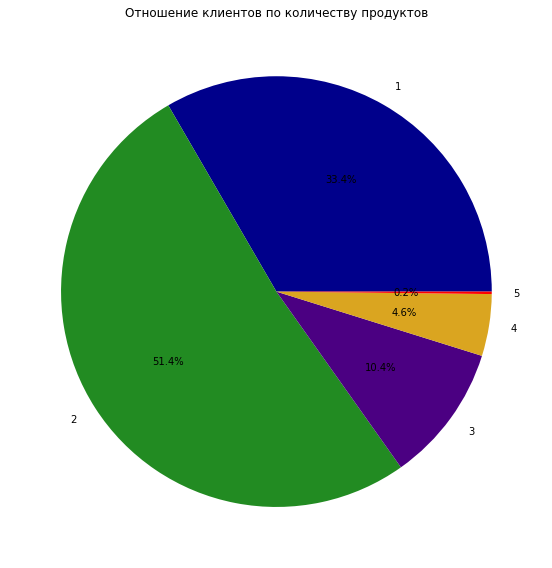

In [81]:
count_product = data.groupby('products')['products'].count()
fig1, ax1 = plt.subplots(figsize=(8, 8))
colors = ['darkblue', 'forestgreen', 'indigo', 'goldenrod', 'red']
ax1.pie(count_product,labels=count_product.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Отношение клиентов по количеству продуктов');

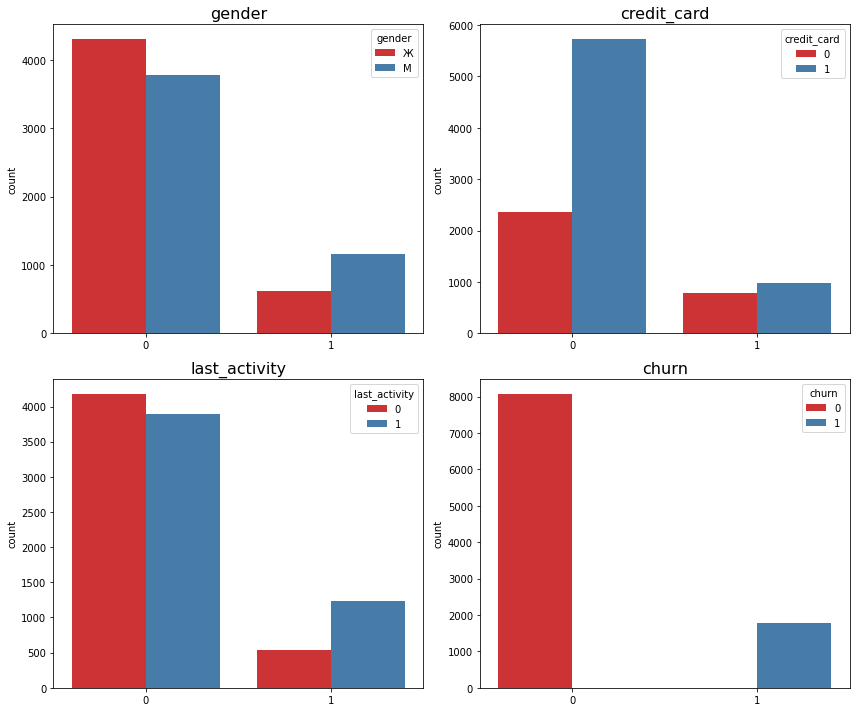

In [82]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, column in enumerate(['gender','credit_card','last_activity', 'churn']):
    row = i // 2
    col = i % 2
    ax = axs[row][col]
    sns.countplot(data=data, x='churn', hue=column, palette='Set1', ax=ax)
    ax.set_title(column, fontsize = 16)
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

На основе проведенного анализа и проверки гипотез можно выделить несколько сегментов пользователей с высокой оттоковой активностью.

Критериями для определения таких сегментов выбраны следующие параметры:

пол;

возраст;

наличие кредитной карты;

активность в последнее время.

<b>1 сегмент.

Параметры: 

- Мужчины и женщины до 50 лет
- На балансе менее 800000 
- Кредитный рейтинг больше 825 баллов

In [83]:
print ('Число пользователей в 1 сегменте - ', data.query (
    'age < 50 and balance < 800000 and score > 825')['user_id'].count())

print ('Число отточных пользователей в 1 сегменте -', data.query (
    'age < 50 and balance < 800000 and score > 825 and churn == 1')['user_id'].count())

print ('Доля отточных пользователей в 1 сегменте -', data.query (
    'age < 50 and balance < 800000 and score > 825 and churn == 1')['user_id'].count() / data.query (
    'age < 50 and balance < 800000 and score > 825 and churn == 0')['user_id'].count()*100)

Число пользователей в 1 сегменте -  1952
Число отточных пользователей в 1 сегменте - 467
Доля отточных пользователей в 1 сегменте - 31.447811447811446


<b>2 сегмент.

Параметры:

- Мужчины и женщины от 50 лет
- Собственность которых оценивается на 3 балла и выше
- Без кредитных карт

In [84]:
print ('Число пользователей во 2 сегменте -', data.query (
    'age < 50 and equity >= 3 and credit_card == 0')['user_id'].count())

print ('Число отточных пользователей во 2 сегменте -', data.query (
    'age < 50 and equity >= 3 and credit_card == 0 and churn == 1')['user_id'].count())

print ('Доля отточных пользователей во 2 сегменте -', data.query (
    'age < 50 and equity >= 3 and credit_card == 0 and churn == 1')['user_id'].count() / data.query (
    'age < 50 and equity >= 3 and credit_card == 0 and churn == 0')['user_id'].count()*100)

Число пользователей во 2 сегменте - 1366
Число отточных пользователей во 2 сегменте - 459
Доля отточных пользователей во 2 сегменте - 50.60639470782801


<b>3 сегмент.

Параметры: 

- Мужчины и женщины до 50 лет
- Кредитный рейтинг больше 825 баллов
- Используют от 2 продуктов банка
- Были активны в последнее время
- На балансе более 800000

In [85]:
print ('Число пользователей во 3 сегменте -', data.query (
    'age < 50 and balance < 800000 and score > 825 and last_activity == 1')['user_id'].count())

print ('Число отточных пользователей во 3 сегменте -', data.query (
    'age < 50 and balance < 800000 and score > 825 and last_activity == 1 and churn == 1')['user_id'].count())

print ('Доля отточных пользователей во 3 сегменте -', data.query (
    'age < 50 and balance < 800000 and score > 825 and last_activity == 1 and churn == 1')['user_id'].count() / data.query (
    'age < 50 and balance < 800000 and score > 825 and last_activity == 1 and churn == 0')['user_id'].count()*100)

Число пользователей во 3 сегменте - 902
Число отточных пользователей во 3 сегменте - 370
Доля отточных пользователей во 3 сегменте - 69.54887218045113


# Рекомендации по снижению оттока клиентов

Основываясь на данных, полученных в результате исследования, можно заключить, что для снижения оттока клиентов необходимо произвести следующие действия:

1. Сегмент:

Предложить финансовые продукты для обеспечения стабильного финансового положения - инвестиционные пакеты, индивидуальные пенсионные планы;

Предложить специальные условия по страхованию;

Информировать о новых доступных банковских продуктах;

Оповестить клиентов о наличии услуги для самозанятых, оплате счетов для физических лиц и малого бизнеса.

2. Сегмент:

Предложить оформить кредитную карту;

Предложить специальные условия по страхованию объектов собственности;

Оповестить клиентов о наличии услуги для самозанятых, оплате счетов для физических лиц и малого бизнеса.

3. Сегмент:

Предложить оформить кредитную карту;

Информировать о новых доступных банковских продуктах;

Предложить финансовые продукты для обеспечения стабильного финансового положения - инвестиционные пакеты, индивидуальные пенсионные планы;

Оповестить клиентов о наличии услуги для самозанятых, оплате счетов для физических лиц и малого бизнеса.